<a href="https://colab.research.google.com/github/Omkar22896/basic/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('weather_history.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2007-08-28 10:00:00.000 +0200,Partly Cloudy,rain,21.355556,21.355556,0.70,12.3487,288,12.1877,0,1015.65,Partly cloudy until morning.
9995,2007-08-28 11:00:00.000 +0200,Partly Cloudy,rain,22.105556,22.105556,0.67,14.1197,292,12.9283,0,1015.39,Partly cloudy until morning.
9996,2007-08-28 12:00:00.000 +0200,Partly Cloudy,rain,22.844444,22.844444,0.63,15.8585,295,13.6528,0,1015.13,Partly cloudy until morning.
9997,2007-08-28 13:00:00.000 +0200,Partly Cloudy,rain,23.544444,23.544444,0.60,17.4685,298,14.3612,0,1014.88,Partly cloudy until morning.


In [ ]:
df.shape

(9999, 12)

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000
mean,11.970131,11.002377,0.739547,10.158485,189.863386,10.033372,0.0,994.763069
std,9.643415,10.815545,0.191499,6.558778,106.656282,3.830044,0.0,153.519440
min,-14.088889,-22.094444,0.150000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.041667,2.166667,0.610000,5.055400,118.000000,9.482900,0.0,1012.710000
50%,12.427778,12.427778,0.790000,9.338000,189.000000,9.982000,0.0,1017.370000
75%,18.933333,18.933333,0.900000,13.532050,289.000000,11.334400,0.0,1022.430000
max,37.127778,38.377778,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


In [ ]:
 df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
Ptype = df['Precip Type'].unique()
Ptype

array(['rain', 'snow'], dtype=object)

In [ ]:
Psize = df.groupby('Precip Type',sort=False).size()
Psize

Precip Type
rain    8708
snow    1291
dtype: int64

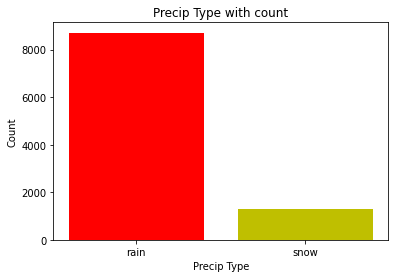

In [ ]:
import matplotlib.pyplot as plt
plt.bar(Ptype,Psize,color = ['red','y'])
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.title('Precip Type with count')
plt.show()

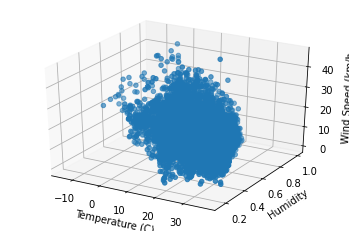

In [ ]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure() 	  	 
ax = fig.add_subplot(111,projection='3d') 
ax.scatter(df['Temperature (C)'],df['Humidity'],df['Wind Speed (km/h)'])
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Wind Speed (km/h')
plt.show()

In [ ]:
 df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
x = df.iloc[:,[3,4,5,6]].values
y = df.iloc[:,[2]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(7499, 4)
(2500, 4)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [ ]:
x_train

array([[0.29818852, 0.38493339, 0.74117647, 0.06063792],
       [0.31890661, 0.40248048, 0.89411765, 0.07570978],
       [0.30827639, 0.3200735 , 0.90588235, 0.38450754],
       ...,
       [0.05575442, 0.0829582 , 0.71764706, 0.24079916],
       [0.67892396, 0.7073955 , 0.70588235, 0.27760252],
       [0.21998048, 0.28773542, 0.74117647, 0.10550298]])

In [ ]:
x_test

array([[0.61015294, 0.64915021, 0.25882353, 0.49246407],
       [0.74107821, 0.76003675, 0.55294118, 0.276551  ],
       [0.34157718, 0.36720257, 0.91764706, 0.28776726],
       ...,
       [0.22356004, 0.25089573, 0.95294118, 0.25622152],
       [0.49170192, 0.54882866, 0.95294118, 0.07290571],
       [0.1296236 , 0.15911805, 0.70588235, 0.23659306]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array(['rain', 'rain', 'rain', ..., 'snow', 'rain', 'snow'], dtype=object)

In [ ]:
y_pred

array(['rain', 'rain', 'rain', ..., 'snow', 'rain', 'snow'], dtype=object)

In [ ]:
y_test

array([['rain'],
       ['rain'],
       ['rain'],
       ...,
       ['snow'],
       ['rain'],
       ['snow']], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        rain       0.99      0.99      0.99      2193
        snow       0.95      0.94      0.94       307

    accuracy                           0.99      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.99      0.99      0.99      2500



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100

98.64

In [ ]:
confusion_matrix(y_pred,y_test)

array([[2177,   16],
       [  18,  289]])

In [ ]:
 ypred1 = model.predict(s.transform([[0.9,6.44,260,6.118]]))

In [ ]:
ypred1

array(['snow'], dtype=object)